# Wrangle and Analyse Data


In the following project I am going to gather and analyze data all around the Twitter account WeRateDogs. For that, data is gathered via manual download, programmatical download and over an API. After that I am going to assess this data, define the issues found during the assessment and clean these issues to get a cleaned master dataframe.

# Libraries needed

In [1]:
import requests #download data
import numpy as np #array functions
import pandas as pd #data handling
import tweepy #twitter api
import json #handle json data
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization
import re #text processing

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Read the csv file**

In [2]:
url = 'https://raw.githubusercontent.com/hiyabose/Data-Analysis/master/twitter-archive-enhanced.csv'
df_twitter = pd.read_csv(url)

df_twitter.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


 Tweet image predictions (image_predictions.tsv)

To gather this data we are going to define the file - url, request this url and write the content of the response to a separate file.

In [0]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

#get response
response = requests.get(url)

#write return to an image
with open("image_predictions.tsv", mode = "wb") as file:
    file.write(response.content)

In [4]:
df_predict = pd.read_csv("image_predictions.tsv", sep='\t')

df_predict.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [0]:
#keys and token to access the API
consumer_key = '2qopv7u6bmUPgAz9g2Ohgrpty'
consumer_secret = 'IIY5pT9Jk0rWvUjKyxXO1wZkqtobgFzcInZvSJNidZ37dFWZ4x'
access_token = '1257573345849114625-envmhYExtGo68GLgq6QMn5K5E8uTCZ'
access_secret = 'QAq34XlTNg3xaziFXHNcYdj7bUa92w9qRpcDxLzlBAfEJ'

#access the API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [0]:
twitter_ids = list(df_twitter.tweet_id.unique())

In [7]:
with open("tweet_json.txt", "w") as file: 
  for ids in twitter_ids:
     print(f"Gather id: {ids}") 
     try:

        #get all the twitter status - extended mode gives us additional data
        tweet = api.get_status(ids, tweet_mode = "extended")
        #dump the json data to our file
        json.dump(tweet._json, file)
        #add a linebreak after each dump
        file.write('\n')
     except Exception as e:
        print(f"Error - id: {ids}" + str(e))

Gather id: 892420643555336193
Gather id: 892177421306343426
Gather id: 891815181378084864
Gather id: 891689557279858688
Gather id: 891327558926688256
Gather id: 891087950875897856
Gather id: 890971913173991426
Gather id: 890729181411237888
Gather id: 890609185150312448
Gather id: 890240255349198849
Gather id: 890006608113172480
Gather id: 889880896479866881
Gather id: 889665388333682689
Gather id: 889638837579907072
Gather id: 889531135344209921
Gather id: 889278841981685760
Gather id: 888917238123831296
Gather id: 888804989199671297
Gather id: 888554962724278272
Gather id: 888202515573088257
Error - id: 888202515573088257[{'code': 144, 'message': 'No status found with that ID.'}]
Gather id: 888078434458587136
Gather id: 887705289381826560
Gather id: 887517139158093824
Gather id: 887473957103951883
Gather id: 887343217045368832
Gather id: 887101392804085760
Gather id: 886983233522544640
Gather id: 886736880519319552
Gather id: 886680336477933568
Gather id: 886366144734445568
Gather id:

Rate limit reached. Sleeping for: 600


Gather id: 758474966123810816
Gather id: 758467244762497024
Gather id: 758405701903519748
Gather id: 758355060040593408
Gather id: 758099635764359168
Gather id: 758041019896193024
Gather id: 757741869644341248
Gather id: 757729163776290825
Gather id: 757725642876129280
Gather id: 757611664640446465
Gather id: 757597904299253760
Gather id: 757596066325864448
Gather id: 757400162377592832
Gather id: 757393109802180609
Gather id: 757354760399941633
Gather id: 756998049151549440
Gather id: 756939218950160384
Gather id: 756651752796094464
Gather id: 756526248105566208
Gather id: 756303284449767430
Gather id: 756288534030475264
Gather id: 756275833623502848
Gather id: 755955933503782912
Gather id: 755206590534418437
Gather id: 755110668769038337
Gather id: 754874841593970688
Gather id: 754856583969079297
Gather id: 754747087846248448
Gather id: 754482103782404096
Gather id: 754449512966619136
Gather id: 754120377874386944
Gather id: 754011816964026368
Error - id: 754011816964026368[{'code': 

Rate limit reached. Sleeping for: 600


Gather id: 676957860086095872
Gather id: 676949632774234114
Gather id: 676948236477857792
Gather id: 676946864479084545
Gather id: 676942428000112642
Gather id: 676936541936185344
Gather id: 676916996760600576
Gather id: 676897532954456065
Gather id: 676864501615042560
Gather id: 676821958043033607
Gather id: 676819651066732545
Gather id: 676811746707918848
Gather id: 676776431406465024
Gather id: 676617503762681856
Gather id: 676613908052996102
Gather id: 676606785097199616
Gather id: 676603393314578432
Gather id: 676593408224403456
Gather id: 676590572941893632
Gather id: 676588346097852417
Gather id: 676582956622721024
Gather id: 676575501977128964
Gather id: 676533798876651520
Gather id: 676496375194980353
Gather id: 676470639084101634
Gather id: 676440007570247681
Gather id: 676430933382295552
Gather id: 676263575653122048
Gather id: 676237365392908289
Gather id: 676219687039057920
Gather id: 676215927814406144
Gather id: 676191832485810177
Gather id: 676146341966438401
Gather id:

In [8]:
api_data = []

#read the created file
with open("tweet_json.txt", "r") as f:
    for line in f:
        try: 
            tweet = json.loads(line)
            #append a dictionary to the created list            
            api_data.append({
                "tweet_id": tweet["id"],
                "retweet_count": tweet["retweet_count"],
                "favorite_count": tweet["favorite_count"],
                "retweeted": tweet["retweeted"],
                "display_text_range": tweet["display_text_range"]                
            })               
                
            #tweet["entities"]["media"][0]["media_url"]
        except:
            print("Error.") 
            
df_api = pd.DataFrame(api_data, columns = ["tweet_id", "retweet_count", "favorite_count", "retweeted", "display_text_range"])
df_api.head()

,tweet_id,retweet_count,favorite_count,retweeted,display_text_range
0,892420643555336193,7724,36279,False,"[0, 85]"
1,892177421306343426,5711,31274,False,"[0, 138]"
2,891815181378084864,3786,23546,False,"[0, 121]"
3,891689557279858688,7870,39553,False,"[0, 79]"
4,891327558926688256,8496,37764,False,"[0, 138]"


Thus the JSON file table is created

In [9]:
df_twitter.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [10]:
df_predict.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [11]:
df_api.head(1)

,tweet_id,retweet_count,favorite_count,retweeted,display_text_range
0,892420643555336193,7724,36279,False,"[0, 85]"


# Data Assessing

Now we will look at all the dataset and see where we need to clean the data

**df_twitter**

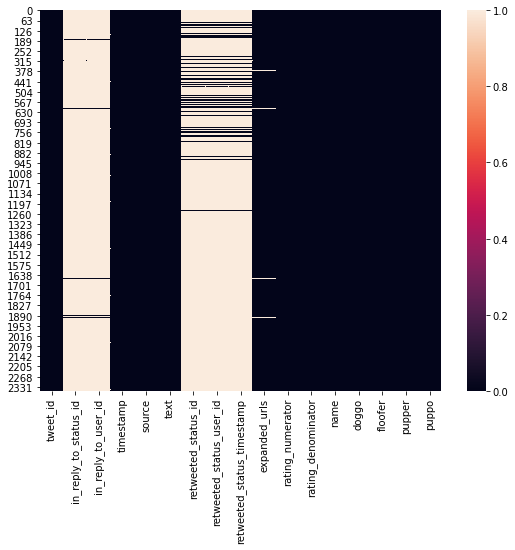

In [12]:
fig, ax = plt.subplots(figsize = (9,7))
ax = sns.heatmap(df_twitter.isnull(), vmin=0, vmax = 1)

Here from the visual we can see that there a lot of missing datas in the reply and the retweet section

In [13]:
df_twitter.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1928,674045139690631169,NaN,NaN,2015-12-08 01:57:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Herd of wild dogs here. Not sure what they're ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674045139...,3,10,None,None,None,None,None
382,827228250799742977,NaN,NaN,2017-02-02 18:52:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Phil. He's an important...,6.946697e+17,4.196984e+09,2016-02-02 23:52:22 +0000,https://twitter.com/dog_rates/status/694669722...,12,10,Phil,None,None,None,None
467,817120970343411712,NaN,NaN,2017-01-05 21:29:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Name a more iconic quartet... I'll wait. 13/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817120970...,13,10,None,None,None,None,None
1132,728760639972315136,NaN,NaN,2016-05-07 01:37:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...","When you're way too slow for the ""down low"" po...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/728760639...,13,10,None,None,None,None,None
1637,684195085588783105,NaN,NaN,2016-01-05 02:09:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tino. He really likes corndogs. 9/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684195085...,9,10,Tino,None,None,None,None


here we can see that the doggo ,floofer ,	pupper ,puppo has a majority value of None .

In [14]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Also we can see that tbere is incorrect data type
1. tweet_id is int but it should be string
2. timestamp is object but it should be data and time

In [15]:
df_twitter.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
           ... 
Jett          1
life          1
Alfy          1
Severus       1
Heinrich      1
Name: name, Length: 957, dtype: int64

Here we can see that there are many wrong name like "None", "a", "the" etc.

In [16]:
#to check the duplicated data
df_twitter[df_twitter.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


we can see that there is no duplicated data

In [17]:
#how many unique tweet id
df_twitter.tweet_id.nunique()

2356

This also proves that there are no duplicated values since the entire data set has unique tweet_ids

In [0]:
df_twitter_assess = df_twitter.copy()

In [19]:
#returns true if there is no dog classification in any of the columns
df_twitter_assess[["doggo","floofer","pupper","puppo"]].apply(lambda x: True if
    (x[0] == "None" and x[1] == "None" and x[2] == "None" and x[3] =="None") 
    else False, axis = 1).value_counts()

True     1976
False     380
dtype: int64

In [20]:
df_twitter_assess["doggo"].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [21]:
df_twitter_assess["floofer"].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [22]:
df_twitter_assess["pupper"].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [23]:
df_twitter_assess["puppo"].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [24]:
(380/2356) * 100

16.129032258064516

So we can see that only about 16% of the data is not missing.

Now lets have a look at the Ratings

In [25]:
df_twitter.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

Here we can see that the highest Rating is 1776 and the lowest is 0.
So lets see them in details

In [26]:
print(df_twitter.query("rating_numerator == '1776'").text)

979    This is Atticus. He's quite simply America af....
Name: text, dtype: object


In [27]:
print(df_twitter.query("rating_numerator == '1'").text)

605     RT @dog_rates: Not familiar with this breed. N...
1446    After reading the comments I may have overesti...
1869    What kind of person sends in a picture without...
1940    The millennials have spoken and we've decided ...
2038    After 22 minutes of careful deliberation this ...
2091    Flamboyant pup here. Probably poisonous. Won't...
2261    Never seen dog like this. Breathes heavy. Tilt...
2335    This is an Albanian 3 1/2 legged  Episcopalian...
2338    Not familiar with this breed. No tail (weird)....
Name: text, dtype: object


Here we can see that 18669 sends a photo without a dog
and 2335 is being misinterpreted

In [28]:
print(df_twitter.query("rating_numerator == '0'").text)

315     When you're so blinded by your systematic plag...
1016    PUPDATE: can't see any. Even if I could, I cou...
Name: text, dtype: object


We can see here the dogs photos are not clear

In [29]:
#now lets check the denominator values
df_twitter.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

We can see that the highest denominator is 170 and the lowest is zero

In [30]:
print(df_twitter.query("rating_denominator == '170'").text)

1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object


In [31]:
print(df_twitter.query("rating_denominator == '0'").text)

313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object


In [32]:
print(df_twitter.query("rating_denominator == '7'").text)

516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object


In [0]:
#this is to extract all the actual ratings and split the denom and num into seperate columns
pattern = "(\d+(\.\d+)?\/\d+(\.\d+)?)" 
df_twitter_assess["rating"] = df_twitter_assess.text.str.extract(pattern, expand = True)[0]
df_twitter_assess[['num', 'denom']] = df_twitter_assess['rating'].str.split('/', n=1, expand=True)

In [0]:
df_twitter_assess.rating_numerator = df_twitter_assess.rating_numerator.astype("str")
df_twitter_assess.rating_denominator = df_twitter_assess.rating_denominator.astype("str")


In [0]:
df_twitter_assess["check_num"] = df_twitter_assess[["rating_numerator", "num"]].apply(lambda x: False if (x[0] != x[1]) else True, axis = 1)

In [36]:
df_twitter_assess.check_num.value_counts()

True     2349
False       7
Name: check_num, dtype: int64

In [37]:
df_twitter_assess.query("check_num == False")[["rating_numerator", "num","check_num"]]

,rating_numerator,num,check_num
45,5,13.5,False
340,75,9.75,False
387,7,007,False
695,75,9.75,False
763,27,11.27,False
1689,5,9.5,False
1712,26,11.26,False


These are the differences we found by extracting the first occurrence of the pattern. These ratings got transformed to integers and are therefore wrong.

In [38]:
df_twitter_assess[["rating_numerator", "num", "check_num"]].sample(15)

,rating_numerator,num,check_num
967,13,13,True
2245,10,10,True
1392,6,6,True
2331,8,8,True
2240,9,9,True
1576,10,10,True
1583,5,5,True
1141,13,13,True
1138,12,12,True
2052,10,10,True


In [0]:
#doing the same for denominator
df_twitter_assess["check_denom"] = df_twitter_assess[["rating_denominator", "denom"]].apply(lambda x: False if (x[0] != x[1]) else True, axis = 1)

In [40]:
df_twitter_assess.check_denom.value_counts()

True     2355
False       1
Name: check_denom, dtype: int64

In [41]:
df_twitter_assess.query("check_denom == False")[["rating_denominator", "denom","check_denom"]]

,rating_denominator,denom,check_denom
313,0,00,False


Its not a issue. we can keep the data same

In [42]:
df_twitter_assess[["rating_denominator", "denom", "check_denom"]].sample(5)

,rating_denominator,denom,check_denom
2152,10,10,True
463,10,10,True
1907,10,10,True
1800,10,10,True
1784,10,10,True


Now lets asssess the data to look how many times there are multiple ratings

In [0]:
df_twitter_assess["count"] = df_twitter_assess.text.str.count(pattern)

In [44]:
df_twitter_assess["count"].value_counts()

1    2323
2      32
3       1
Name: count, dtype: int64

In [45]:
#show the full text
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 4000)

df_twitter_assess[["text", "count"]].query("count != 1")

,text,count
55,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,2
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",2
561,"RT @dog_rates: ""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",2
766,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",2
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",2
860,RT @dog_rates: Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https:/…,2
1007,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,2
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",2
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,2
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,2




We can see that:

    this data contains retweets (as mentioned before)
    sometimes there are multiple dogs/cats or else in one picture
    some of these ratings are not clear



**df_Predict**

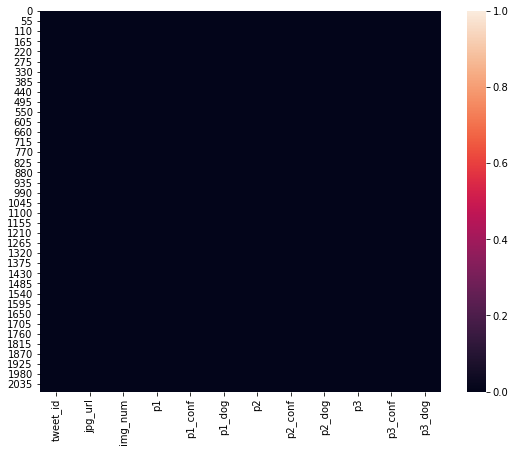

In [46]:
fig, ax = plt.subplots(figsize = (9,7))
ax = sns.heatmap(df_predict.isnull(), vmin = 0, vmax = 1)



It looks perfect with no missing data

In [47]:
df_predict.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
85,667509364010450944,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True
32,666428276349472768,https://pbs.twimg.com/media/CT-g-0DUwAEQdSn.jpg,1,Pembroke,0.371361,True,chow,0.249394,True,Pomeranian,0.241878,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
1820,834458053273591808,https://pbs.twimg.com/media/C5SXK89XUAQg7GX.jpg,1,Rhodesian_ridgeback,0.468619,True,whippet,0.177531,True,redbone,0.106552,True
1123,727175381690781696,https://pbs.twimg.com/media/ChdyJvdWwAA5HGd.jpg,2,flat-coated_retriever,0.656463,True,Great_Dane,0.084766,True,Labrador_retriever,0.058909,True
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,0.000055,False,acorn,0.000026,False
193,669571471778410496,https://pbs.twimg.com/media/CUrLsI-UsAALfUL.jpg,1,minivan,0.873488,False,pickup,0.041259,False,beach_wagon,0.015400,False
471,675135153782571009,https://pbs.twimg.com/media/CV6P1lnWIAAUQHk.jpg,1,stove,0.587507,False,rotisserie,0.051713,False,microwave,0.020725,False
60,667138269671505920,https://pbs.twimg.com/media/CUImtzEVAAAZNJo.jpg,1,West_Highland_white_terrier,0.747713,True,Samoyed,0.243629,True,toy_poodle,0.001804,True
1028,710997087345876993,https://pbs.twimg.com/media/Cd34FClUMAAnvGP.jpg,1,malamute,0.281260,True,Eskimo_dog,0.232641,True,Pembroke,0.091602,True




We can see that:

1.the predicitions are sometimes lowercase, sometimes uppercase
2. there is an underscore instead of a whitespace between the words
3. there are rows with no prediciton of a dog (neither in 1, 2 nor 3)



In [48]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Here again the tweet id should be string

In [49]:
#to check the duplicated values
df_predict.jpg_url.value_counts().head(10)

https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg    2
https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg    2
https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg    2
https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg    2
https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg    2
https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg    2
https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg    2
https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg    2
https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg    2
https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg    2
Name: jpg_url, dtype: int64

In [50]:
df_predict[df_predict.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [51]:
df_predict[df_predict.jpg_url == "https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg"]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1638,806629075125202948,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True


In [52]:
df_twitter[df_twitter.tweet_id ==861769973181624320]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
155,861769973181624320,NaN,NaN,2017-05-09 02:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: ""Good afternoon class today we're going to learn what makes a good boy so good"" 13/10 https://t.co/f1h2Fsalv9",8.066291e+17,4.196984e+09,2016-12-07 22:38:52 +0000,"https://twitter.com/dog_rates/status/806629075125202948/photo/1,https://twitter.com/dog_rates/status/806629075125202948/photo/1,https://twitter.com/dog_rates/status/806629075125202948/photo/1,https://twitter.com/dog_rates/status/806629075125202948/photo/1",13,10,None,None,None,None,None


In [53]:
df_predict.query("p1_dog == False and p2_dog == False and p3_dog == False")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [54]:
df_predict.query("p1_dog == False and (p2_dog == True or p3_dog == True)")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,0.104109,True,dingo,0.062071,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True
52,666996132027977728,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,1,hay,0.507637,False,Rottweiler,0.062490,True,water_buffalo,0.048425,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1984,872122724285648897,https://pbs.twimg.com/media/DBpm-5UXcAUeCru.jpg,1,basketball,0.808396,False,pug,0.066736,True,dalmatian,0.054570,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2013,879376492567855104,https://pbs.twimg.com/media/DDQsQGFV0AAw6u9.jpg,1,tricycle,0.663601,False,Labrador_retriever,0.033496,True,Pembroke,0.018827,True
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True


After looking at some pictures it is clear that some dogs pictures are not properly visible

**df_api**

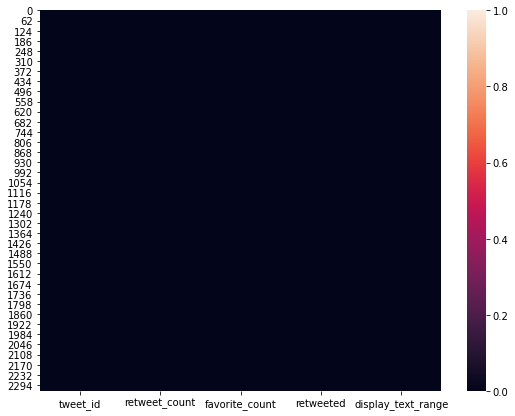

In [55]:
fig, ax = plt.subplots(figsize = (9,7))
ax = sns.heatmap(df_api.isnull(), vmin = 0, vmax = 1)


we can see that there is no missing values

In [56]:
df_api.sample(10)

,tweet_id,retweet_count,favorite_count,retweeted,display_text_range
1909,674014384960745472,611,1511,False,"[0, 139]"
61,880095782870896641,3973,25965,False,"[0, 129]"
1704,679862121895714818,617,2445,False,"[0, 73]"
2315,666099513787052032,60,142,False,"[0, 140]"
633,792773781206999040,1723,7509,False,"[0, 114]"
1526,689154315265683456,1001,3068,False,"[0, 139]"
762,775729183532220416,4662,13170,False,"[0, 102]"
962,749064354620928000,1531,4827,False,"[0, 113]"
2156,668994913074286592,217,425,False,"[0, 140]"
1157,719332531645071360,945,3415,False,"[0, 140]"


In [57]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2331 non-null   int64 
 1   retweet_count       2331 non-null   int64 
 2   favorite_count      2331 non-null   int64 
 3   retweeted           2331 non-null   bool  
 4   display_text_range  2331 non-null   object
dtypes: bool(1), int64(3), object(1)
memory usage: 75.2+ KB


This dataset looks okay.
There is no missing values and only thing that needs to be changed is tweet id datatype to string

#Assessing Summary


#Quality


df_twitter table

   1. the datatype of the id - columns is integer and should be str
   2. the datatype of the timestamp - column is object and should be datetime
   3. some of the dogs are not classified as one of "doggo", "floofer", "pupper" or "puppo" and contain all "None" instead
   4. some of the dog names are not correct (None, an, by, a, ...)
     contains retweets
   5. some of the ratings are not correctly extracted (mostly if there are >1 entries with the pattern "(\d+(.\d+)?\/\d+(.\d+)?)"
   6. also transforming the ratings to integer created some mistakes (there are also floats)
   7. the source column contains html code

df_predict table

    1. the datatype of the id - columns is integer and should be str
    2. contains retweets (duplicated rows in column jpg_url)
    3. there are pictures in this table that are not dogs
    4. the predictions are sometimes uppercase, sometimes lowercase
    5. also there is a "_" instead of a whitespace in the predictions

df_api table

    1. the datatype of the id - columns is integer and should be str



#Tidiness

df_twitter table

    1. the columns doggo, floofer,pupper and puppo are not easy to analyze and should be in one column

df_predict table

    1. the prediction and confidence columns should be reduced to two columns - one for the prediction with the highest confidence (dog)

df_api table

   1.  display_text_range contains 2 variables

all tables

    1. All three tables share the column tweet_id and should be merged together.



#Data Cleaning

Cleaning steps:

    1. Merge the tables together
    2. Drop the replies, retweets and the corresponding columns and also drop the tweets without an image or with images which don't display doggos
    3. Clean the datatypes of the columns
    4. Clean the wrong numerators - the floats on the one hand (replacement), the ones with multiple occurence of the pattern on the other (drop)
    5. Extract the source from html code
    6. Split the text range into two separate columns
    7. Remove the "None" out of the doggo, floofer, pupper and puppo column and merge them into one column
    8. Remove the wrong names of name column
    9. Reduce the prediction columns into two - breed and conf
    10. Clean the new breed column by replacing the "_" with a whitespace and make them all lowercase



Define:

merge the tables

code

In [0]:
#outer join to not loose rows at first
df_master = pd.merge(df_twitter, df_api, on = "tweet_id", how = "outer")

In [0]:
df_master = pd.merge(df_master, df_predict, on = "tweet_id", how = "outer")

In [0]:
df_master_clean = df_master.copy()

test

In [61]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Define:

Drop the replies, retweets and the corresponding columns and also drop the tweets without an image or with images which don't display doggos

Code:

we can see that there are a lot of missing values...let's visualise it 

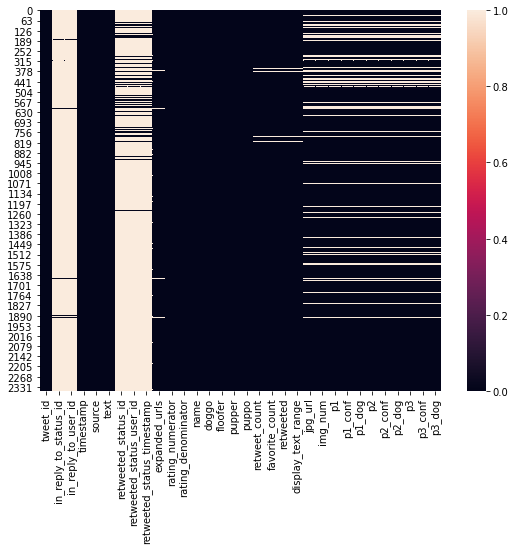

In [62]:
fig, ax = plt.subplots(figsize = (9,7))
ax = sns.heatmap(df_master_clean.isnull(), vmin = 0, vmax = 1)

In [63]:
pd.set_option('display.max_colwidth', 50) #to set the column width
df_master_clean[df_master_clean["retweeted"].isnull()] #to check the empty rows

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,retweeted,display_text_range,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2.0,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1.0,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
101,872668790621863937,NaN,NaN,2017-06-08 04:17:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @loganamnosis: Penelope here is doing me qu...,8.726576e+17,1.547674e+08,2017-06-08 03:32:35 +0000,https://twitter.com/loganamnosis/status/872657...,14,10,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,872261713294495745,NaN,NaN,2017-06-07 01:19:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harry. His ears are activated one at a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872261713...,13,10,Harry,None,None,None,None,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DBrlZk2UQAAfAkd.jpg,2.0,Labrador_retriever,0.972019,True,flat-coated_retriever,0.008178,True,Chesapeake_Bay_retriever,0.007359,True
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,866816280283807744,NaN,NaN,2017-05-23 00:41:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Jamesy. He gives a kiss...,8.664507e+17,4.196984e+09,2017-05-22 00:28:40 +0000,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,861769973181624320,NaN,NaN,2017-05-09 02:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: ""Good afternoon class today we'...",8.066291e+17,4.196984e+09,2016-12-07 22:38:52 +0000,https://twitter.com/dog_rates/status/806629075...,13,10,None,None,None,None,None,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2.0,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
182,856602993587888130,NaN,NaN,2017-04-24 20:17:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Luna. It's her first ti...,8.447048e+17,4.196984e+09,2017-03-23 00:18:10 +0000,https://twitter.com/dog_rates/status/844704788...,13,10,Luna,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,851953902622658560,NaN,NaN,2017-04-12 00:23:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,8.293743e+17,4.196984e+09,2017-02-08 17:00:26 +0000,https://twitter.com/dog_rates/status/829374341...,13,10,Astrid,doggo,None,None,None,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1.0,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay

In [0]:
#we only want the rows without an entry in "retweeted_status_id" in our master dataframe
df_master_clean = df_master_clean[df_master_clean["retweeted_status_id"].isnull()]

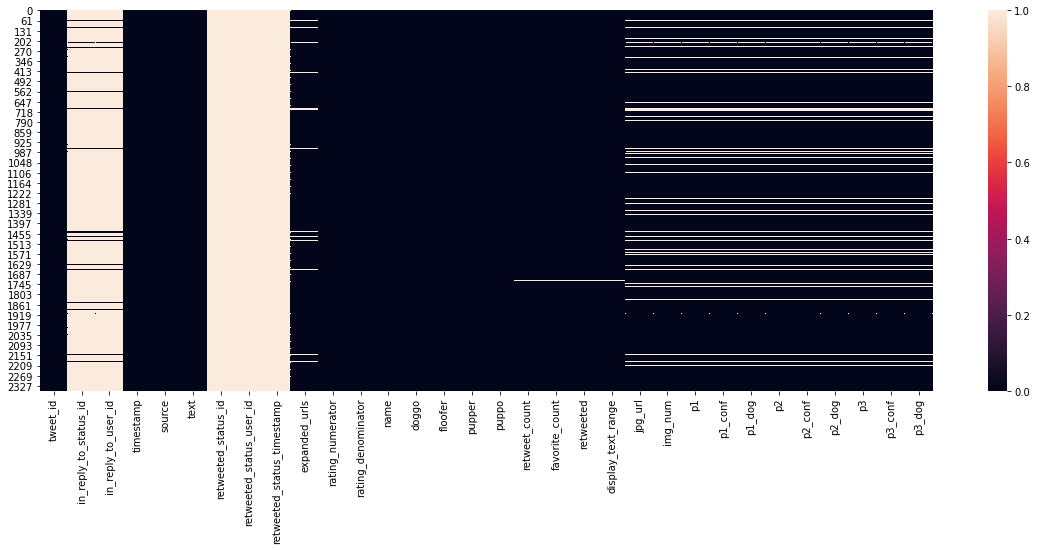

In [65]:
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df_master_clean.isnull(), vmin = 0, vmax = 1)

In [66]:
#check with the column from the api table, no retweets left
df_master_clean.retweeted.value_counts()

False    2168
Name: retweeted, dtype: int64

In [0]:
#same as for the retweets, we only want the rows without an entry in "in_reply_to_status_id"
df_master_clean = df_master_clean[df_master_clean.in_reply_to_status_id.isnull()]

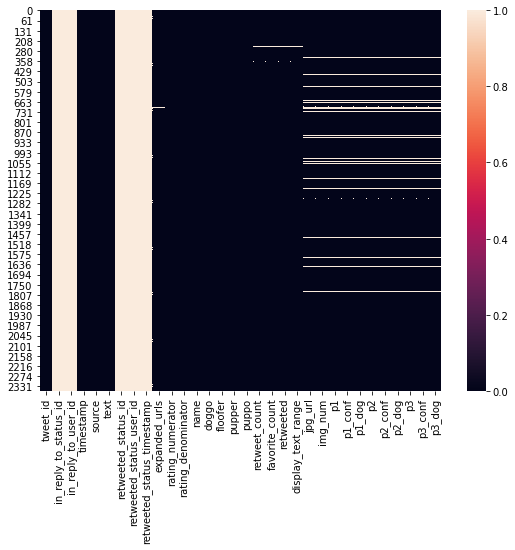

In [68]:
fig, ax = plt.subplots(figsize = (9,7))
ax = sns.heatmap(df_master_clean.isnull(), vmin = 0, vmax = 1)



During the gathering process from the API there were some tweets, which got deleted by the account. We will also drop them out of our master dataframe.

In [0]:
df_master_clean.dropna(subset = ["retweeted"], inplace = True)

In [0]:
#drop the unneeded columns
df_master_clean.drop(["in_reply_to_status_id", "in_reply_to_user_id",
                      "retweeted_status_id", "retweeted_status_user_id", 
                      "retweeted_status_timestamp", "retweeted"], inplace=True, axis = 1)

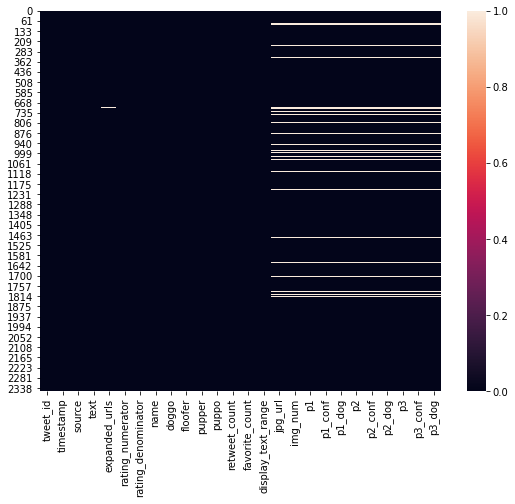

In [71]:
fig, ax = plt.subplots(figsize = (9,7))
ax = sns.heatmap(df_master_clean.isnull(), vmin = 0, vmax = 1)

In [0]:
df_master_clean.dropna(subset = ["jpg_url"], inplace = True)

In [73]:
sum(df_master_clean.jpg_url.duplicated())

0

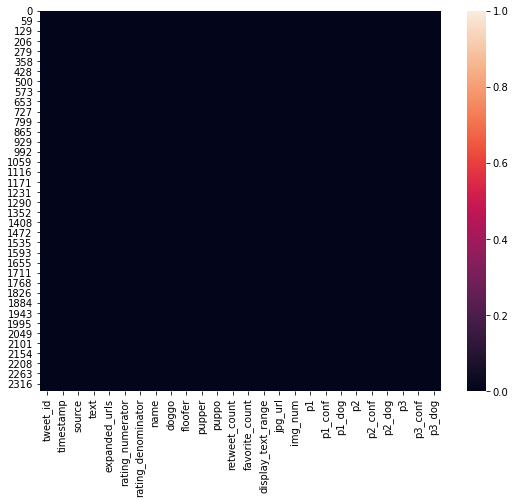

In [74]:
fig, ax = plt.subplots(figsize = (9,7))
ax = sns.heatmap(df_master_clean.isnull(), vmin = 0, vmax = 1)

Looks like we have cleaned all the missing data

In [0]:
#to clean all the images that doesnot displays dog
df_master_clean.drop(df_master_clean.query("p1_dog == False and p2_dog == False and p3_dog == False").index, inplace = True)

In [76]:
df_master_clean.query("p1_dog == False and p2_dog == False and p3_dog == False")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,display_text_range,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


Test:

In [77]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1659 entries, 1 to 2355
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1659 non-null   int64  
 1   timestamp           1659 non-null   object 
 2   source              1659 non-null   object 
 3   text                1659 non-null   object 
 4   expanded_urls       1659 non-null   object 
 5   rating_numerator    1659 non-null   int64  
 6   rating_denominator  1659 non-null   int64  
 7   name                1659 non-null   object 
 8   doggo               1659 non-null   object 
 9   floofer             1659 non-null   object 
 10  pupper              1659 non-null   object 
 11  puppo               1659 non-null   object 
 12  retweet_count       1659 non-null   float64
 13  favorite_count      1659 non-null   float64
 14  display_text_range  1659 non-null   object 
 15  jpg_url             1659 non-null   object 
 16  img_nu

Define:

Clean the datatypes of the columns

Code:

In [0]:
#to change the datatype
df_master_clean["tweet_id"] = df_master_clean["tweet_id"].astype("str")

In [0]:
#transform the timestamp to datetime
df_master_clean["timestamp"] = pd.to_datetime(df_master_clean.timestamp)

In [0]:
for x in ["retweet_count", "favorite_count", "img_num"]:
    df_master_clean[x] = df_master_clean[x].astype("int64")

Test:

In [81]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1659 entries, 1 to 2355
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1659 non-null   object             
 1   timestamp           1659 non-null   datetime64[ns, UTC]
 2   source              1659 non-null   object             
 3   text                1659 non-null   object             
 4   expanded_urls       1659 non-null   object             
 5   rating_numerator    1659 non-null   int64              
 6   rating_denominator  1659 non-null   int64              
 7   name                1659 non-null   object             
 8   doggo               1659 non-null   object             
 9   floofer             1659 non-null   object             
 10  pupper              1659 non-null   object             
 11  puppo               1659 non-null   object             
 12  retweet_count       1659 non-null 

Define:

Clean the wrong numerators - the floats on the one hand, the ones with multiple occurence of the pattern on the other

Now we need to correct all the numerators. And since we have dropped a lot of rows we dont know which problems are still there so lets extract again

Code:

In [82]:
pattern = "(\d+\.\d+\/\d+)"

df_master_clean.text.str.extract(pattern, expand = True)[0].dropna()

45       13.5/10
695      9.75/10
763     11.27/10
1712    11.26/10
Name: 0, dtype: object

In [0]:
#get the right numerator out of the string
df_num_clean = df_master_clean.text.str.extract(pattern, expand = True)[0].dropna().str.split('/', n=1, expand=True)[0]

In [84]:
df_num_clean

45       13.5
695      9.75
763     11.27
1712    11.26
Name: 0, dtype: object

In [0]:
#get the index of the wrong data
df_num_clean_index = df_num_clean.index
df_num_clean_values = df_num_clean.values.astype("float64")

In [86]:
#transform the datatypes to float
df_master_clean.rating_numerator = df_master_clean.rating_numerator.astype("float64")
df_master_clean.rating_denominator = df_master_clean.rating_denominator.astype("float64")
#impute the data
df_master_clean.loc[df_num_clean_index, "rating_numerator"] = df_num_clean_values
df_master_clean.loc[df_num_clean_index].rating_numerator

45      13.50
695      9.75
763     11.27
1712    11.26
Name: rating_numerator, dtype: float64

In [87]:
#There were multiple occurence in ratings so to clean that
pattern = "(\d+(\.\d+)?\/\d+(\.\d+)?)"

print(df_master_clean.text.str.count(pattern)[df_master_clean.text.str.count(pattern) != 1])

#get the index of the rows which contains the pattern more than once
pattern_clean_index = df_master_clean.text.str.count(pattern)[df_master_clean.text.str.count(pattern) != 1].index

766     2
1007    2
1068    2
1165    2
1202    2
1222    2
1359    2
1465    2
1508    2
1525    2
1538    2
1662    2
1795    2
1832    2
1897    2
1901    2
1970    2
2010    3
2064    2
2113    2
2177    2
2216    2
2263    2
2272    2
2306    2
2335    2
Name: text, dtype: int64


In [0]:
df_master_clean.drop(pattern_clean_index, inplace = True)

In [89]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1633 entries, 1 to 2355
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1633 non-null   object             
 1   timestamp           1633 non-null   datetime64[ns, UTC]
 2   source              1633 non-null   object             
 3   text                1633 non-null   object             
 4   expanded_urls       1633 non-null   object             
 5   rating_numerator    1633 non-null   float64            
 6   rating_denominator  1633 non-null   float64            
 7   name                1633 non-null   object             
 8   doggo               1633 non-null   object             
 9   floofer             1633 non-null   object             
 10  pupper              1633 non-null   object             
 11  puppo               1633 non-null   object             
 12  retweet_count       1633 non-null 

Test:

In [90]:
#no more occurrences of the mentioned problem are left
print(df_master_clean.text.str.count(pattern)[df_master_clean.text.str.count(pattern) != 1])

Series([], Name: text, dtype: int64)


Define:

 Extract the source from html code

Code:

In [91]:
df_master_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,display_text_range,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,5711,31274,"[0, 138]",https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,3786,23546,"[0, 121]",https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


we can see that here the image is stored in a html tag so we need to extract it out of the HTML tag

In [0]:
df_master_clean.source = df_master_clean.source.str.extract("\>(.*?)\<", expand = True)

Test:

In [93]:
df_master_clean.iloc[:,:3].head(4)

,tweet_id,timestamp,source
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone


In [94]:
df_master_clean.source.value_counts()

Twitter for iPhone    1605
Twitter Web Client      20
TweetDeck                8
Name: source, dtype: int64

Define:

Split the text range into two separate columns

Code:

In [95]:
df_master_clean[["display_text_range"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1633 entries, 1 to 2355
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   display_text_range  1633 non-null   object
dtypes: object(1)
memory usage: 25.5+ KB


In [96]:
df_master_clean.display_text_range[1]

[0, 138]

In [0]:
#get the lower text range at list index 0
df_master_clean["lower_text_range"] = df_master_clean["display_text_range"].apply(lambda x: x[0])

#get the lower text range at list index 1
df_master_clean["upper_text_range"] = df_master_clean["display_text_range"].apply(lambda x: x[1])
df_master_clean.drop("display_text_range", axis = 1, inplace = True)

Test:

In [98]:
df_master_clean[["lower_text_range", "upper_text_range"]].head()

,lower_text_range,upper_text_range
1,0,138
2,0,121
3,0,79
4,0,138
5,0,138


Define:

Remove the "None" out of the doggo, floofer, pupper and puppo column and merge them into one column

Code:

Now we need to merge the doggo,puppo,etc into one column

In [99]:
#to merge all the columns at first we need to replace the none value with " "
#replace "None" with "" in each column
for x in ["doggo", "floofer", "pupper", "puppo"]:
    df_master_clean[x].replace("None", "", inplace = True)

#concatenate the columns
df_master_clean['dog_class'] = df_master_clean['doggo'].map(str) + df_master_clean[
    'floofer'].map(str) + df_master_clean['pupper'].map(str) + df_master_clean['puppo'].map(str)
df_master_clean.dog_class.value_counts()


                1379
pupper           164
doggo             53
puppo             21
floofer            7
doggopupper        7
doggofloofer       1
doggopuppo         1
Name: dog_class, dtype: int64

In [0]:
#replace the leftover "" with np.nan
df_master_clean["dog_class"].replace("", np.nan, inplace = True)

In [101]:
df_master_clean.dog_class.value_counts()

pupper          164
doggo            53
puppo            21
floofer           7
doggopupper       7
doggofloofer      1
doggopuppo        1
Name: dog_class, dtype: int64

In [102]:
#count the occurrences of the pattern and show the rows with count > 1
df_master_clean.text.str.count(r'(\bpuppo\b|\bdoggo\b|\bfloofer\b|\bpupper\b)')[
    df_master_clean.text.str.count(r'(\bpuppo\b|\bdoggo\b|\bfloofer\b|\bpupper\b)') > 1]

191     2
531     3
575     2
889     2
956     2
1063    2
1113    2
1304    2
1340    2
1367    2
1653    2
1788    2
1828    2
1907    3
Name: text, dtype: int64

In [0]:
df_master_clean["dog_class_re"] = df_master_clean.text.str.extract(
    r'(\bpuppo\b|\bdoggo\b|\bfloofer\b|\bpupper\b)', expand = True)

In [104]:
pd.set_option('display.max_colwidth', -1)

#find the differences of the extract
df_master_clean[["text","dog_class", "dog_class_re"]].dropna(subset = ["dog_class_re"]).query("dog_class != dog_class_re")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,text,dog_class,dog_class_re
191,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,doggopuppo,puppo
200,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",doggofloofer,doggo
531,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,doggopupper,pupper
575,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,doggopupper,doggo
889,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",doggopupper,doggo
956,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,doggopupper,doggo
1063,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,doggopupper,pupper
1113,"Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",doggopupper,doggo


In [0]:
#I read the text and corrected the dog class
df_master_clean.loc[191, "dog_class"] = "puppo"
df_master_clean.loc[200, "dog_class"] = "floofer"
df_master_clean.loc[531, "dog_class"] = np.nan
df_master_clean.loc[575, "dog_class"] = "pupper"
df_master_clean.loc[889, "dog_class"] = np.nan
df_master_clean.loc[956, "dog_class"] = np.nan
df_master_clean.loc[1063, "dog_class"] = np.nan
df_master_clean.loc[1113, "dog_class"] = np.nan

In [106]:
df_master_clean[["text","dog_class", "dog_class_re"]].dropna(subset = ["dog_class_re"]).query("dog_class != dog_class_re")

,text,dog_class,dog_class_re
200,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",floofer,doggo
531,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,pupper
575,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,pupper,doggo
889,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",NaN,doggo
956,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,NaN,doggo
1063,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,NaN,pupper
1113,"Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",NaN,doggo


In [0]:
#drop the columns out
df_master_clean.drop(["doggo", "floofer", "pupper", "puppo", "dog_class_re"], inplace = True, axis = 1)

Test:

In [108]:
#count the occurrences of the pattern and show the rows with count > 1
df_master_clean[["text", "dog_class"]].loc[
    df_master_clean.text.str.count(r'(\bpuppo\b|\bdoggo\b|\bfloofer\b|\bpupper\b)')[
        df_master_clean.text.str.count(r'(\bpuppo\b|\bdoggo\b|\bfloofer\b|\bpupper\b)') > 1].index]

,text,dog_class
191,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,puppo
531,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN
575,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,pupper
889,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",NaN
956,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,NaN
1063,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,NaN
1113,"Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",NaN
1304,"""I shall trip the big pupper with leash. Big pupper will never see it coming. I am a genius."" Both 11/10 https://t.co/uQsCJ8pf51",pupper
1340,Here is a heartbreaking scene of an incredible pupper being laid to rest. 10/10 RIP pupper https://t.co/81mvJ0rGRu,pupper
1367,"This is Sansa. She's gotten too big for her chair. Not so smol anymore. 11/10 once a pupper, always a pupper https://t.co/IpAoztle2s",pupper


All looks correct

Define:

Remove the wrong names of name column

Code:

In [0]:
#here we will remove all the wrong names 
for x in ["None", "a", "by", "the"]:
    df_master_clean["name"].replace(x, np.nan, inplace = True)

In [0]:
#to convert all the lowercase into uppercase
df_master_clean["name"]= df_master_clean["name"].str.upper().str.title() 


Test:

In [113]:
df_master_clean.name.value_counts()

Cooper       10
Lucy         9 
Oliver       9 
Tucker       9 
Charlie      9 
            .. 
Enchilada    1 
Reptar       1 
Rey          1 
Dewey        1 
Rocco        1 
Name: name, Length: 833, dtype: int64

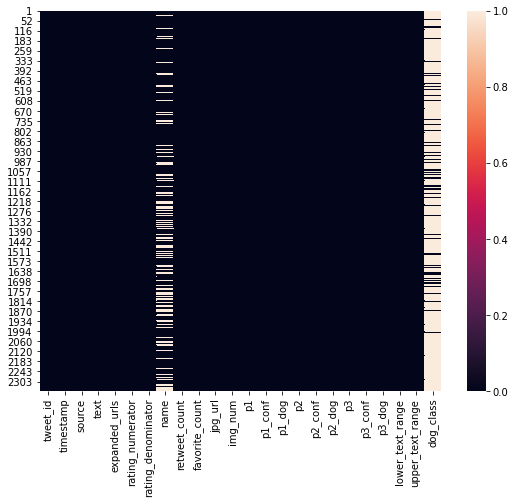

In [114]:
fig, ax = plt.subplots(figsize = (9,7))
ax = sns.heatmap(df_master_clean.isnull(), vmin = 0, vmax = 1)

Define:

Reduce the prediction columns into two - breed and conf

Code:

In [0]:
#now we will reduce the columns
def get_attr(x):
    """
    INPUT: 
        Columns in this order: Check1, Result1, Check2, Result2, Result3
    OUTPUT:
        Results based on the check in this columns
    """
    if x[0] == True:
        return x[1]
    elif x[2] == True:
        return x[3]
    else:
        return x[4]
    
df_master_clean["breed"] = df_master_clean[["p1_dog", "p1", "p2_dog", "p2", "p3"]].apply(get_attr, axis = 1)
df_master_clean["conf"] = df_master_clean[["p1_dog", "p1_conf", "p2_dog", "p2_conf", "p3_conf"]].apply(get_attr, axis = 1)

In [116]:
df_master_clean.iloc[:, 12:]

,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,lower_text_range,upper_text_range,dog_class,breed,conf
1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,0,138,NaN,Chihuahua,0.323581
2,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,0,121,NaN,Chihuahua,0.716012
3,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,0,79,NaN,Labrador_retriever,0.168086
4,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,0,138,NaN,basset,0.555712
5,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,0,138,NaN,Chesapeake_Bay_retriever,0.425595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,0,120,NaN,miniature_pinscher,0.560311
2352,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,0,137,NaN,Rhodesian_ridgeback,0.408143
2353,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,0,130,NaN,German_shepherd,0.596461
2354,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,0,139,NaN,redbone,0.506826


In [0]:
#drop the reduced columns
df_master_clean.drop(df_master_clean.columns[12:21], inplace = True, axis = 1)

Test:

In [118]:
df_master_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,lower_text_range,upper_text_range,dog_class,breed,conf
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,5711,31274,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,0,138,NaN,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,3786,23546,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,0,121,NaN,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,7870,39553,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,0,79,NaN,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,8496,37764,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,0,138,NaN,basset,0.555712
5,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,NaN,2844,19031,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,0,138,NaN,Chesapeake_Bay_retriever,0.425595


Define:

Clean the new breed column by replacing the "_" with a whitespace and make them all lowercase

Test:

In [0]:
#replace "_" with " "
df_master_clean.breed = df_master_clean.breed.str.replace("_", " ")

In [120]:
df_master_clean.breed

1       Chihuahua               
2       Chihuahua               
3       Labrador retriever      
4       basset                  
5       Chesapeake Bay retriever
                  ...           
2351    miniature pinscher      
2352    Rhodesian ridgeback     
2353    German shepherd         
2354    redbone                 
2355    Welsh springer spaniel  
Name: breed, Length: 1633, dtype: object

Test:

In [121]:
df_master_clean.breed = df_master_clean.breed.str.lower()

df_master_clean.breed.value_counts().head(10)

golden retriever      154
labrador retriever    103
pembroke              93 
chihuahua             87 
pug                   62 
toy poodle            49 
chow                  48 
samoyed               41 
pomeranian            39 
malamute              33 
Name: breed, dtype: int64

In [0]:
#reset index to match with the real amount of rows
df_master_clean.reset_index(drop = True, inplace = True)

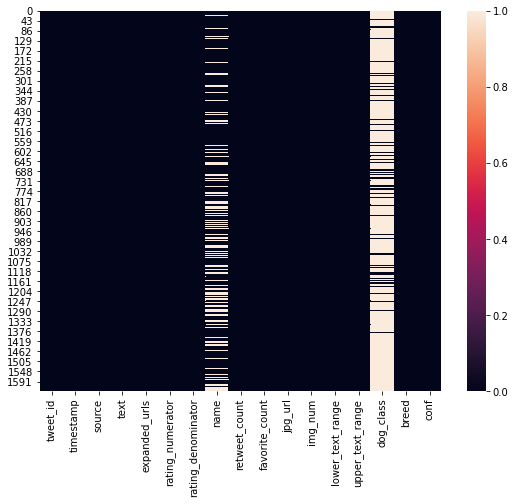

In [123]:
fig, ax = plt.subplots(figsize = (9,7))
ax = sns.heatmap(df_master_clean.isnull(), vmin = 0, vmax = 1)

Here we can see that our data is much cleaner now

In [0]:
#save the data to a *.csv file
df_master_clean.to_csv('twitter_archive_master.csv', index = False)

# Data Analysis



Questions:

    1. Based on the predicted, most likely dog breed: Which breed gets retweeted and favorited the most overall?
    2. How did the account develop (speaking about number of tweets, retweets, favorites, image number and length of the tweets)?
    3. Is there a pattern visible in the timing of the tweets?



In [125]:
#read in the master csv
df = pd.read_csv("twitter_archive_master.csv")
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,lower_text_range,upper_text_range,dog_class,breed,conf
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,5711,31274,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,0,138,NaN,chihuahua,0.323581
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,3786,23546,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,0,121,NaN,chihuahua,0.716012
2,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,7870,39553,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,0,79,NaN,labrador retriever,0.168086
3,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,8496,37764,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,0,138,NaN,basset,0.555712
4,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,NaN,2844,19031,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,0,138,NaN,chesapeake bay retriever,0.425595


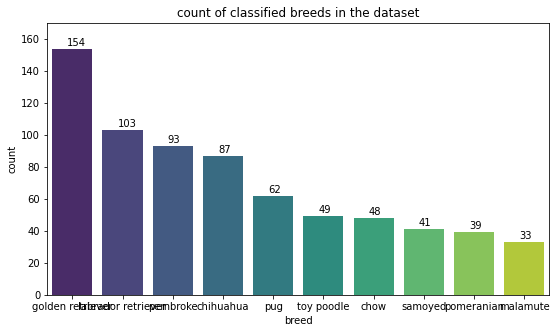

In [126]:
fig, ax = plt.subplots(figsize = (9,5))
ax = sns.countplot(x = "breed", data = df, order=df.breed.value_counts().iloc[:10].index, palette = "viridis")
ax.set_title("count of classified breeds in the dataset");

ax.set_ylim(0, 170)
#https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+2))



So, we can see that the dogs mostly reviewd is golden retriever and the second is labrador

In [0]:
df_breed_group = df[["retweet_count", "favorite_count", "breed"]].groupby("breed", as_index = False).sum()

In [128]:
df_breed_group.sort_values("retweet_count", ascending = False).head(10)

,breed,retweet_count,favorite_count
45,golden retriever,505767,1765317
62,labrador retriever,347611,1122845
80,pembroke,258521,969308
27,chihuahua,213018,679398
88,samoyed,170594,517312
41,french bulldog,144674,563965
30,cocker spaniel,127323,368197
28,chow,117596,419006
82,pug,103741,350518
81,pomeranian,99759,294446


In [129]:
df_breed_group.sort_values("favorite_count", ascending = False).head(10)

,breed,retweet_count,favorite_count
45,golden retriever,505767,1765317
62,labrador retriever,347611,1122845
80,pembroke,258521,969308
27,chihuahua,213018,679398
41,french bulldog,144674,563965
88,samoyed,170594,517312
28,chow,117596,419006
30,cocker spaniel,127323,368197
82,pug,103741,350518
66,malamute,96965,327694


Here also we can see that the golden retriever and the labrader tops the list

In [130]:
df_breed_group["sum"] = df_breed_group["retweet_count"] + df_breed_group["favorite_count"]

df_breed_group.sort_values("sum", ascending = False).head(10)



,breed,retweet_count,favorite_count,sum
45,golden retriever,505767,1765317,2271084
62,labrador retriever,347611,1122845,1470456
80,pembroke,258521,969308,1227829
27,chihuahua,213018,679398,892416
41,french bulldog,144674,563965,708639
88,samoyed,170594,517312,687906
28,chow,117596,419006,536602
30,cocker spaniel,127323,368197,495520
82,pug,103741,350518,454259
66,malamute,96965,327694,424659


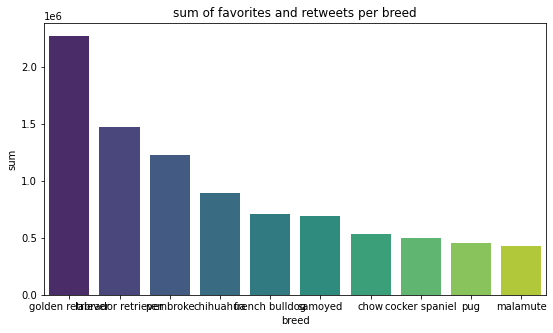

In [131]:
fig, ax = plt.subplots(figsize = (9,5))
ax = sns.barplot(x = "breed", y = "sum", data = df_breed_group.sort_values("sum", ascending=False).iloc[:10], palette = "viridis")
ax.set_title("sum of favorites and retweets per breed");

In [132]:
df[["retweet_count", "favorite_count", "breed"]].sort_values("retweet_count", ascending = False).head(5)

,retweet_count,favorite_count,breed
678,77980,156474,labrador retriever
705,57814,115587,eskimo dog
356,56860,120894,chihuahua
271,43933,133277,lakeland terrier
53,40629,99413,english springer


In [133]:
df[["retweet_count", "favorite_count", "breed"]].sort_values("favorite_count", ascending = False).head(5)

,retweet_count,favorite_count,breed
678,77980,156474,labrador retriever
271,43933,133277,lakeland terrier
356,56860,120894,chihuahua
99,33031,116603,french bulldog
705,57814,115587,eskimo dog


In [0]:
#see the mean average rating
df_breed_group_mean = df[["rating_numerator", "breed"]].groupby("breed", as_index = False).mean()

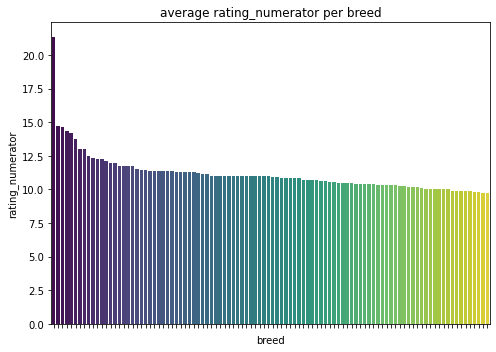

In [135]:
fig, ax = plt.subplots(figsize = (7,5))
ax = sns.barplot(x = "breed", y = "rating_numerator", data = df_breed_group_mean.sort_values("rating_numerator", ascending = False).iloc[:100], palette = "viridis")
ax.set_title("average rating_numerator per breed");
ax.xaxis.set_ticklabels([])
plt.tight_layout()

In [136]:
df_breed_group_mean.sort_values("rating_numerator", ascending = False).head(10)

,breed,rating_numerator
96,soft-coated wheaten terrier,21.357143
109,west highland white terrier,14.687500
48,great pyrenees,14.666667
16,borzoi,14.333333
28,chow,14.166667
62,labrador retriever,13.728155
4,australian terrier,13.000000
18,bouvier des flandres,13.000000
87,saluki,12.500000
21,briard,12.333333


In [137]:
df[["breed", "rating_numerator"]].sort_values("rating_numerator", ascending = False).head(5)

,breed,rating_numerator
583,labrador retriever,165.0
1222,chow,144.0
1116,soft-coated wheaten terrier,121.0
823,golden retriever,99.0
1269,labrador retriever,88.0


In [138]:
df.query("breed != 'soft-coated wheaten terrier'").rating_numerator.mean()

11.261754169240271



The soft-coated wheaten terrier got a very high mean rating. In fact, the labrador retriever got overall the biggest rating with 165, but since there are a lot more tweets with labrador retriever than for the soft-coated wheaten terrier, the one big rating of the soft-coated wheaten terrier has a higher weight then the one of the labrador retriever (14 tweets of soft-coated wheaten terrier and 105 of labrador retriever).

Not taking the outlier into account, this leads us to an average rating of 11. Based on the number of posts, retweets, favorites and mean rating, we will give the title of "Most overall liked dog of this Twitter account and its community" to the labrador retriever.


In [139]:
df_time = df.copy()
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1633 entries, 0 to 1632
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1633 non-null   int64  
 1   timestamp           1633 non-null   object 
 2   source              1633 non-null   object 
 3   text                1633 non-null   object 
 4   expanded_urls       1633 non-null   object 
 5   rating_numerator    1633 non-null   float64
 6   rating_denominator  1633 non-null   float64
 7   name                1190 non-null   object 
 8   retweet_count       1633 non-null   int64  
 9   favorite_count      1633 non-null   int64  
 10  jpg_url             1633 non-null   object 
 11  img_num             1633 non-null   int64  
 12  lower_text_range    1633 non-null   int64  
 13  upper_text_range    1633 non-null   int64  
 14  dog_class           249 non-null    object 
 15  breed               1633 non-null   object 
 16  conf  

In [0]:
df_time.timestamp = pd.to_datetime(df_time.timestamp)

In [0]:
df_time["dow"] = df_time["timestamp"].apply(lambda x: x.dayofweek)

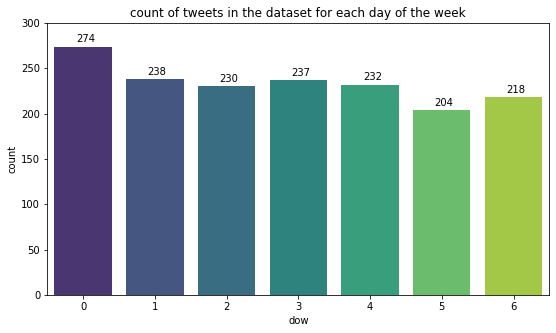

In [142]:
fig, ax = plt.subplots(figsize = (9,5))
ax = sns.countplot(x = "dow", data = df_time, palette = "viridis")
ax.set_title("count of tweets in the dataset for each day of the week");

ax.set_ylim(0, 300)
#https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+5))



we can see that the most tweets are posted on Monday.
For tuesday to friday it is nearly the same number of posts.
On the weekend the Twitter profile tweets a little bil less

In [143]:
df_time.timestamp.min()

Timestamp('2015-11-15 22:32:08+0000', tz='UTC')

In [144]:
df_time.timestamp.max()

Timestamp('2017-08-01 00:17:27+0000', tz='UTC')

The dataset contains data from 2015 to 2017

In [0]:
#get the month out of the timestamp
df_time["month"] = df_time["timestamp"].apply(lambda x: x.month)
#get the year out of the timestamp
df_time["year"] = df_time["timestamp"].apply(lambda x: x.year)
#get the hour out of the timestamp
df_time["hour"] = df_time["timestamp"].apply(lambda x: x.hour)

For the first graph I only want to take a look on the full year 2016

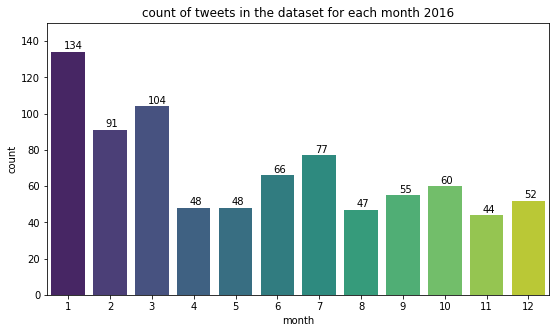

In [146]:
fig, ax = plt.subplots(figsize = (9,5))
ax = sns.countplot(x = "month", data = df_time.query("year == 2016"), palette = "viridis")
ax.set_title("count of tweets in the dataset for each month 2016");


ax.set_ylim(0,150)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+1.5))

Over the timeperiod of 2016 the number of post per months decreased. It went from 134 tweets in January to 52 in December. Does this mean, that the performance of this account is also decreasing?

In [147]:
df_time['month_year'] = pd.to_datetime(df["timestamp"]).dt.to_period('M')

/usr/local/lib/python3.6/dist-packages/pandas/core/arrays/datetimes.py:1104: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


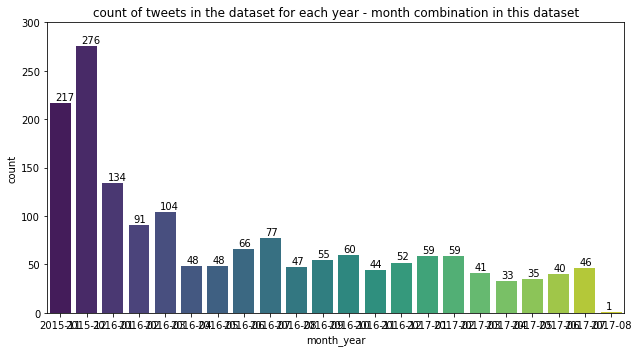

In [148]:
fig, ax = plt.subplots(figsize = (9,5))
ax = sns.countplot(x = "month_year", data = df_time.sort_values("month_year"), palette = "viridis", )
ax.set_title("count of tweets in the dataset for each year - month combination in this dataset");

ax.set_ylim(0, 300)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+3))

plt.tight_layout()

If we look at it over the whole timeperiod it becomes even more clear. In April 2016 the number of tweets dropped and since then it has a relatively stable level. To see if the performance of the Account decreased we will take a look on the favorites and retweets that the posts get.

In [0]:
df_time_groupby = df_time.groupby("month_year", as_index = False).sum()

In [150]:
df_time_groupby.head()

,month_year,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,lower_text_range,upper_text_range,conf,dow,month,year,hour
0,2015-11,1.450925e+20,2049.00,2170.0,92877.0,237746.0,220.0,0.0,26103.0,105.165214,635.0,2387.0,437255.0,1833.0
1,2015-12,1.866097e+20,2986.26,2940.0,390836.0,962342.0,299.0,0.0,31103.0,143.884391,783.0,3312.0,556140.0,2514.0
2,2016-01,9.218872e+19,1505.00,1440.0,156306.0,446641.0,152.0,0.0,15547.0,71.353070,418.0,134.0,270144.0,1082.0
3,2016-02,6.362919e+19,1033.00,980.0,114410.0,331814.0,107.0,0.0,10390.0,49.415261,256.0,182.0,183456.0,737.0
4,2016-03,7.376839e+19,1298.00,1230.0,141131.0,424122.0,123.0,0.0,12282.0,62.738141,310.0,312.0,209664.0,889.0


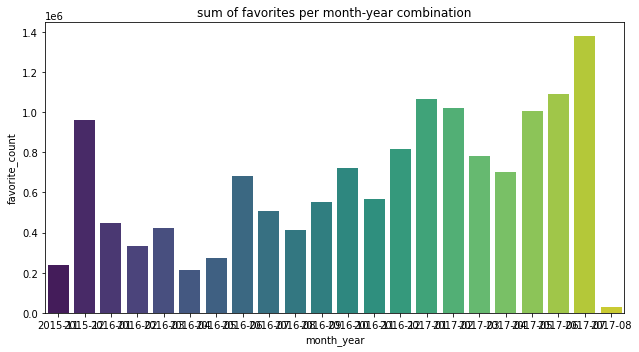

In [151]:
fig, ax = plt.subplots(figsize = (9,5))
ax = sns.barplot(x = "month_year", y = "favorite_count", data = df_time_groupby, palette = "viridis")
ax.set_title("sum of favorites per month-year combination");
plt.tight_layout()

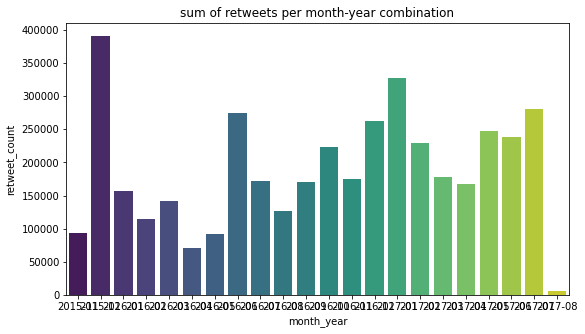

In [152]:
fig, ax = plt.subplots(figsize = (9,5))
ax = sns.barplot(x = "month_year", y = "retweet_count", data = df_time_groupby, palette = "viridis")
ax.set_title("sum of retweets per month-year combination");

Interesting, while the number of tweets per month is decreasing, the favorites and retweets per month are increasing

In [0]:
#create a groupby object over the mean
df_time_groupby_mean = df_time.groupby("month_year", as_index = False).mean()

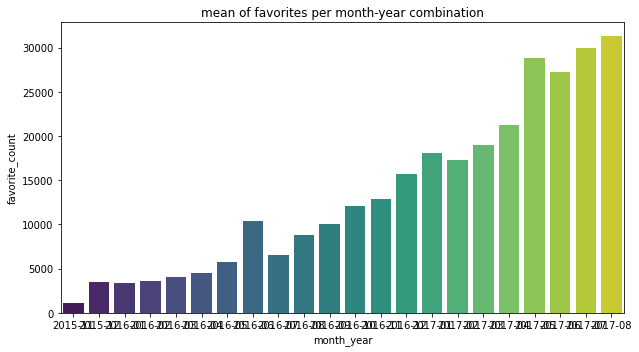

In [154]:
fig, ax = plt.subplots(figsize = (9,5))
ax = sns.barplot(x = "month_year", y = "favorite_count", data = df_time_groupby_mean, palette = "viridis")
ax.set_title("mean of favorites per month-year combination");
plt.tight_layout()

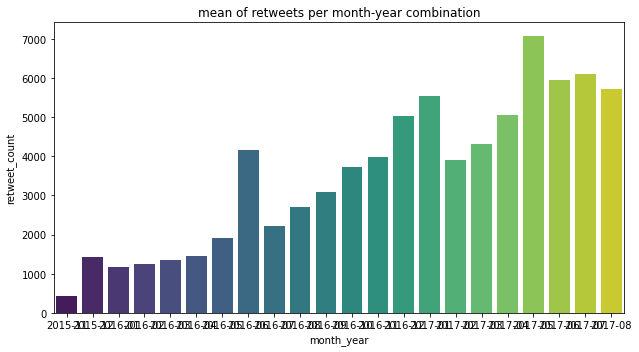

In [155]:
fig, ax = plt.subplots(figsize = (9,5))
ax = sns.barplot(x = "month_year", y = "retweet_count", data = df_time_groupby_mean, palette = "viridis")
ax.set_title("mean of retweets per month-year combination");
plt.tight_layout()

If we look at the average number of favorites and retweets the clear uptrend gets even more clearclearer! Now let's see if the number of posted images per month or the average upper text range changed over time.

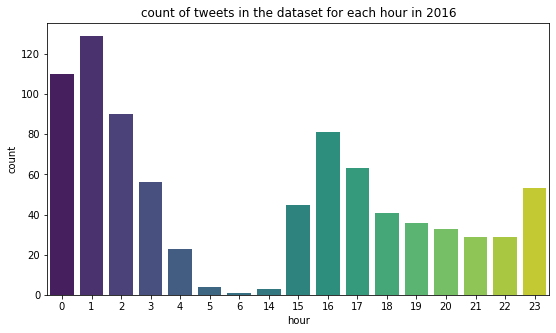

In [156]:
fig, ax = plt.subplots(figsize = (9,5))
ax = sns.countplot(x = "hour", data = df_time.query("year == 2016"), palette = "viridis")
ax.set_title("count of tweets in the dataset for each hour in 2016");

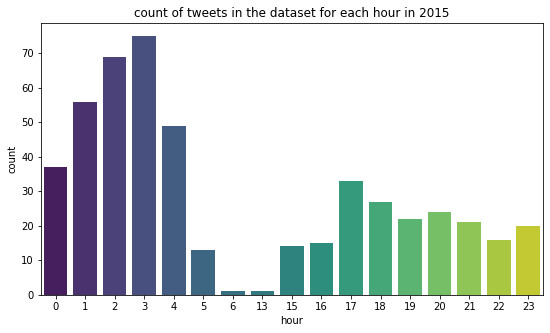

In [157]:
fig, ax = plt.subplots(figsize = (9,5))
ax = sns.countplot(x = "hour", data = df_time.query("year == 2015"), palette = "viridis")
ax.set_title("count of tweets in the dataset for each hour in 2015");

As we can see in this graphs of 2015 and 2016, the most posts are during the night between 0 (inlcuded) and 5 'o clock. between 4 and 15 'o clock there is a very small amounts of tweets, in fact there is no single tweet for the hours 7 - 12 and 14 o' clock. There are some tweets after 14 'o clock, but not as much as between 0 (included) and 5 'o clock.

# Summary and Conclusions



In this project we went through a whole data wrangling process. The gathering included the programmatical, manual download as also the gathering via an API. Also the cleaning part covered a lot of techniques like regular expressions or the overall handling of dataframes.

In the analysis we took a look at following questions:

Questions:
1. Based on the predicted, most likely dog breed: Which breed gets retweeted and favorited the most overall?

 The winner for our analysis was the labrador retriever.

2. How did the account develop (speaking about number of tweets, retweets, favorites, image number and length of the tweets)?

We found, that the number of tweets per month decreased, while the retweets and favorites show an uptrend. For the image numbers there is no clear trend visible, the length of the tweets got a little bit closer to the maximum of 130 in the second half of the dataset.
3. Is there a pattern visible in the timing of the tweets?

Here we found, that between 5 and 15 'o clock there are nearly no tweets at all. The most tweets are during the time from 0 - 4 and then from 15 - 23, but from 15 - 23 are less tweets than between 0 - 4. 




